# Plots for paper

In [1]:
%matplotlib inline
import gc
%config InlineBackend.figure_format = 'retina'
from matplotlib.pylab import *
import matplotlib.pyplot as plt 
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import NullFormatter
rcParams['figure.figsize'] = (12,9)
rcParams['font.size'] = 34
#import logging

In [2]:
import sys
sys.path.append('/Users/earnric/Google Drive/ASU/Codes/PythonCode/modules')
import loadSP as lsp
import cosmo
import halos

import pynbody
import pynbody.plot.sph as sph
import mmap
pynbody.ramses.multiprocess_num = 12
pynbody.config['number_of_threads'] = 36

In [3]:
pynbody.openmp.get_cpus()

24

## We need output 16 and 121 for the paper ... These correspond to z = 16 and z = 8 respectively

In [4]:
#del(s)
gc.collect()

66

In [5]:
s = pynbody.load('output_00097')
s['pos']
s['pos'] -= 0.5
s.physical_units();

/Users/earnric/anaconda/lib/python3.4/site-packages/pynbody/snapshot/ramses.py:521: UserWarning: Using field 'tform' to distinguish stars. If this is wrong, try editing your config.ini, section [ramses], entry particle-distinguisher.
  warnings.warn("Using field %s to distinguish stars. If this is wrong, try editing your config.ini, section [ramses], entry particle-distinguisher."%pb_name)


In [6]:
z = 1/s.properties['a']-1
print ("Redshift = %.2lf"%z)
boxsizestring = "%.2f" % s.properties['boxsize'].in_units('kpc')
boxsizestring += " kpc"
print (boxsizestring)

Redshift = 9.00
421.76 kpc


In [6]:
s.g['zsolar']  = s.g['metal'] * 50.0         # Solar units
s.g['pzsolar'] = s.g['pzf'] * 50.0           # Solar units

s.g['zsolar'][s.g['zsolar']< 1e-5] = 1e-6
s.g['pzsolar'][s.g['pzsolar']< 1e-5] = 1e-6


In [7]:
sbox = 150.0 / (1.0 + z) * 0.71 # 40 kpc comoving box
smallbox = str(sbox) + " kpc"
print(smallbox)

10.650125754947702 kpc


In [8]:
num = 97

boxsizecm = lsp.getBoxSize(num,"/Users/earnric/Research/RAMSES-Data/27Aug15-3Mpc/")

halosRawPos = lsp.loadHaloGrps(num,"27Aug15-3Mpc-output/hop/")
halosRawPos = halosRawPos[:,4:7][0:300]
tbox = boxsizecm/lsp.cmInPc/1000.0 # Convert cm to kpc
halosPos = halosRawPos * tbox
len(halosRawPos)

300

In [13]:
locs, mass, bt, Z, PZ, PPF = lsp.loadSP(z,"27Aug15-3Mpc-output/")

/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


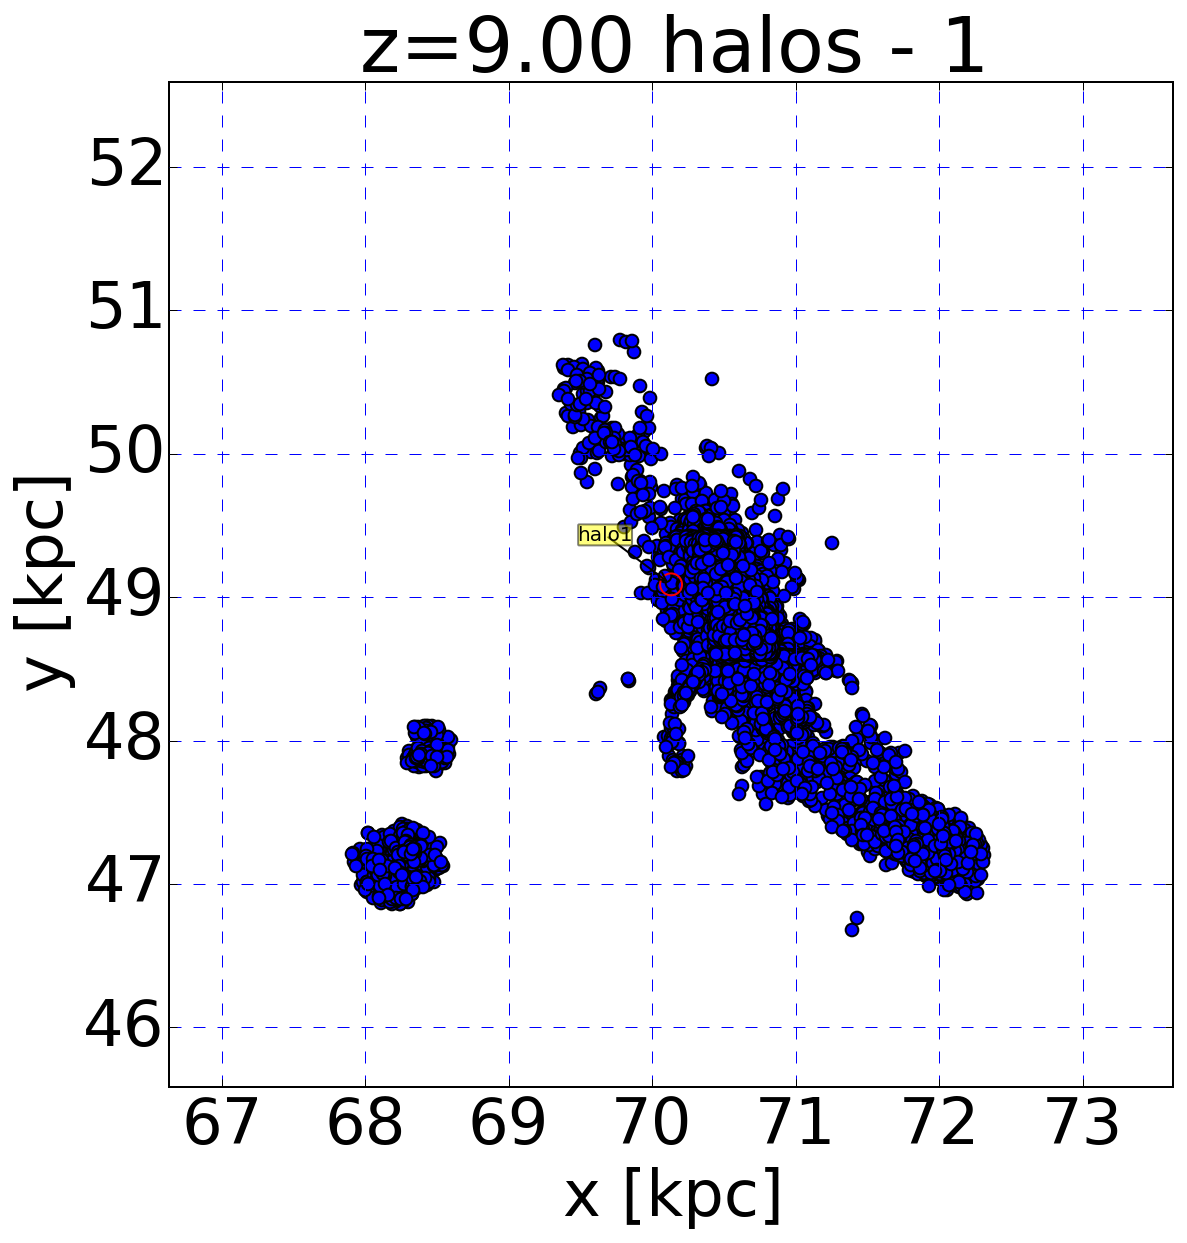

In [63]:
ax=halos.pltHalo(locs,halosPos,1,z,7)

In [42]:
haloStars1, halomass1,haloPZ1,haloPPF1 = halos.getHaloStars(locs, mass, Z, PZ, PPF, halosPos,1,7)


In [48]:
print(halosPos[1])
print(haloStars1[50])

[  70.13181783   49.0880553   198.88253331]
[ 0.23302399  0.39710135 -0.06779904]


In [12]:
i=1 # Halo indx
coords= -halosPos[i] # Translation requires negative of the coord
rx,ry,rz = halosPos[i,0],halosPos[i,1],halosPos[i,2]
impData = s[pynbody.filt.Cuboid(str((rx-sbox)) + " kpc", str((ry-sbox)) + " kpc",str((rz-sbox)) + " kpc",
                                str((rx+sbox)) + " kpc", str((ry+sbox)) + " kpc",str((rz+sbox)) + " kpc")]
# CHANGED Z to full depth

In [15]:
?pynbody.plot.stars.render

In [14]:
s['metals'] = s['metal'] # Need this for render!

/Users/earnric/anaconda/lib/python3.4/site-packages/pynbody/array.py:346: RuntimeWarning: invalid value encountered in true_divide
  return np.ndarray.__truediv__(self, rhs)
/Users/earnric/anaconda/lib/python3.4/site-packages/pynbody/plot/stars.py:66: RuntimeWarning: divide by zero encountered in log10
  return -2.5*np.log10(image*pc2_to_sqarcsec)


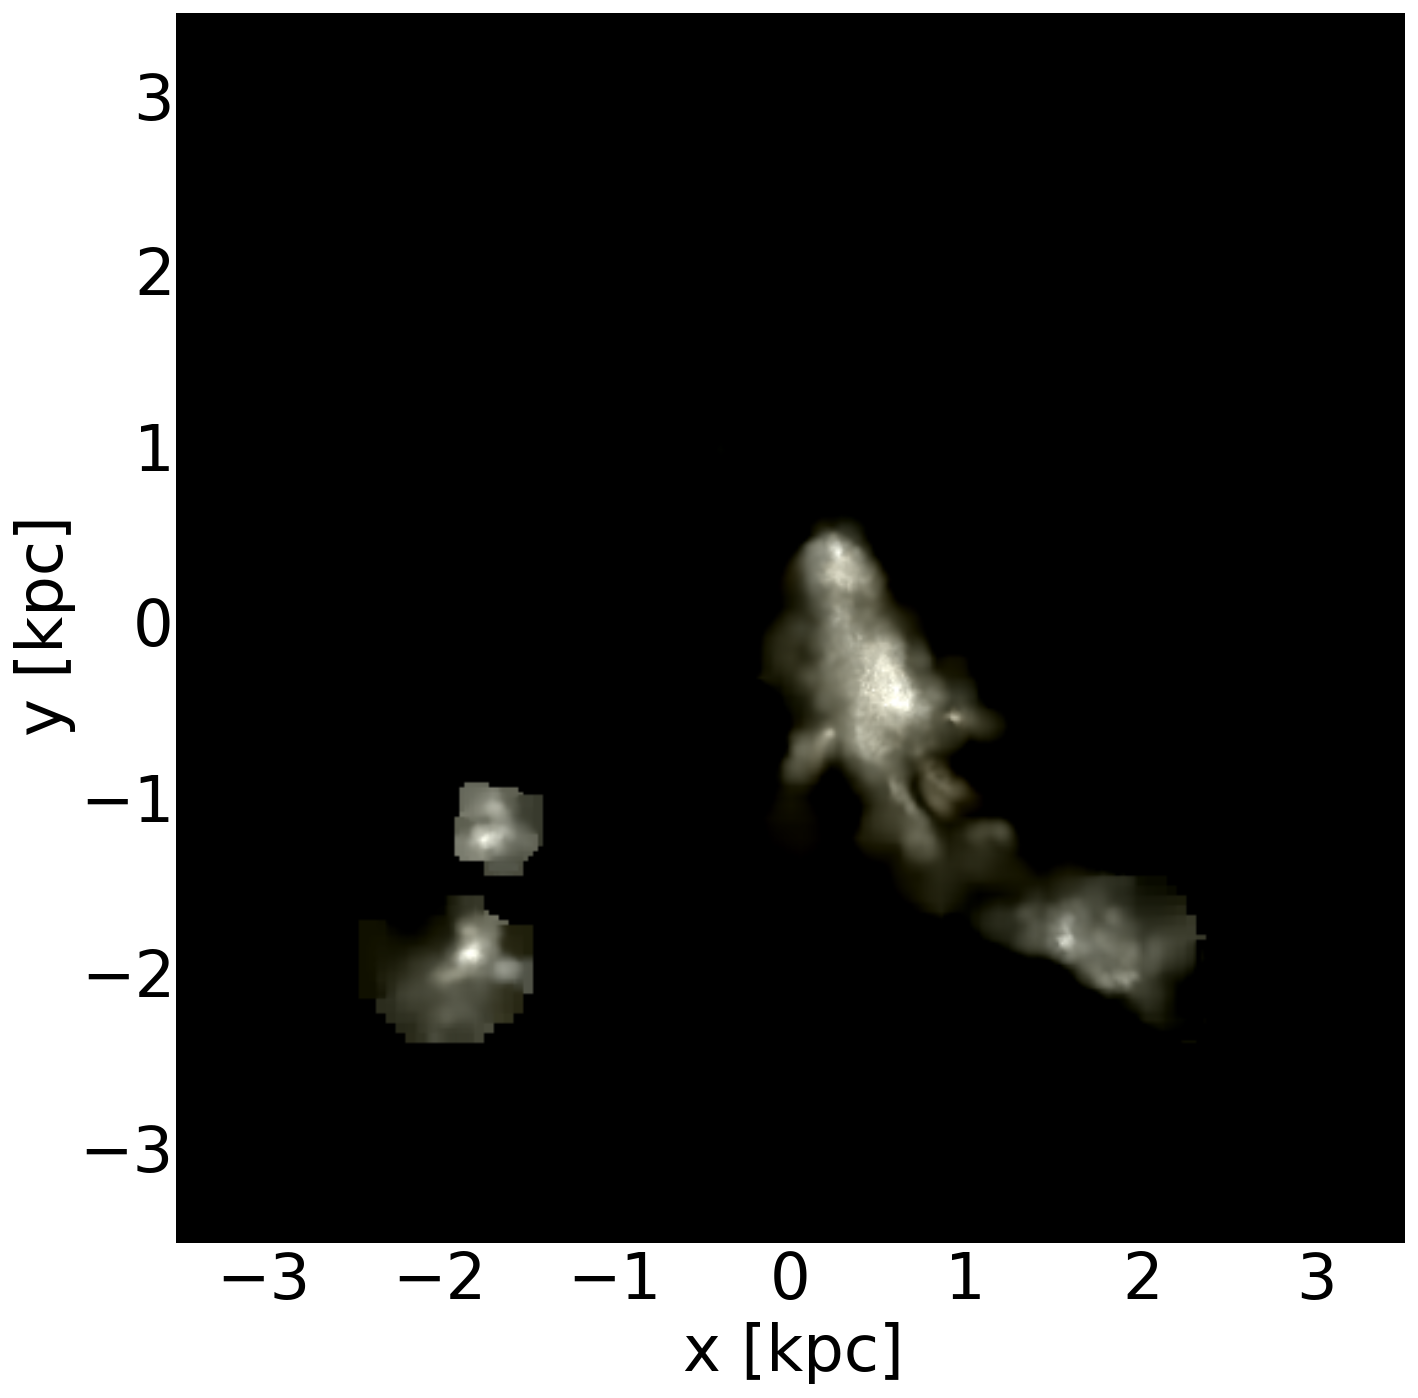

In [65]:
with pynbody.transformation.translate(impData,coords):
    # pynbody.analysis.angmom.faceon(impData,cen=(0,0,0),disk_size='20 kpc')
    pynbody.plot.stars.render(s,width='7 kpc', dynamic_range=3)

Density - z = 9.0


/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


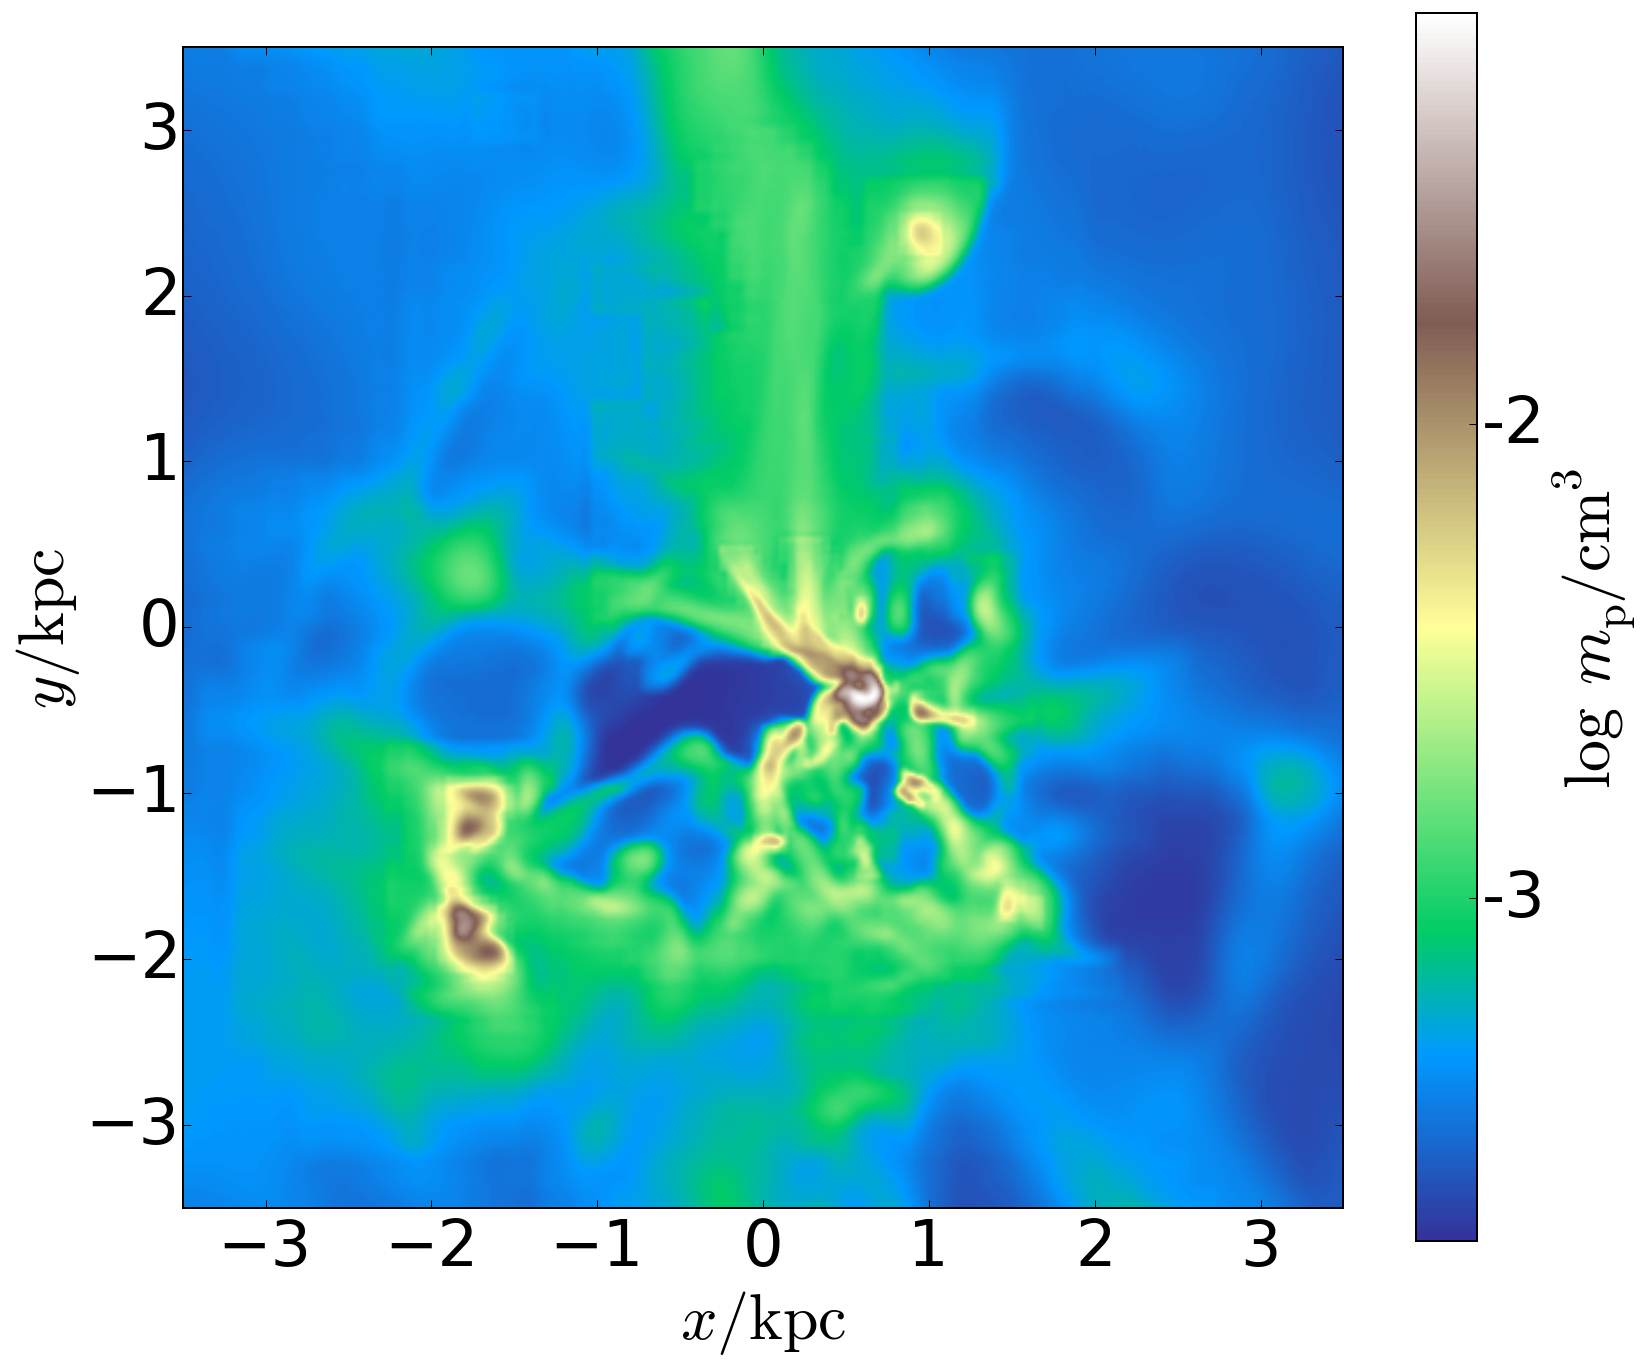

In [39]:
with pynbody.transformation.translate(impData,coords):
    #pynbody.analysis.angmom.faceon(impData,cen=(0,0,0),disk_size='4 kpc')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #ax.set_xlabel(fontsize=40)
    fileOut = "img_log_halo_Density-z=%.1lf-%d.pdf"% (z,i)
    titleStr = "Density - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,i)
    print (titleStr)
    sph.image(s.g,qty="rho",width='7 kpc',cmap="terrain", denoise=True ,av_z=True, units="m_p cm^-3",
                      log=True, approximate_fast=False, 
                      subplot=ax,qtytitle=r"${\rm log}\,m_{\rm p}/{\rm cm}^{3}$"); 
    #ax.set_yticks([-tic, 0,tic])
    plt.savefig(fileOut,dpi=fig.dpi,bbox_inches='tight')
    #plt.close(fig)
    #del(ax)
    gc.collect()


/Users/earnric/anaconda/lib/python3.4/site-packages/pynbody/array.py:346: RuntimeWarning: invalid value encountered in true_divide
  return np.ndarray.__truediv__(self, rhs)
/Users/earnric/anaconda/lib/python3.4/site-packages/pynbody/plot/stars.py:66: RuntimeWarning: divide by zero encountered in log10
  return -2.5*np.log10(image*pc2_to_sqarcsec)


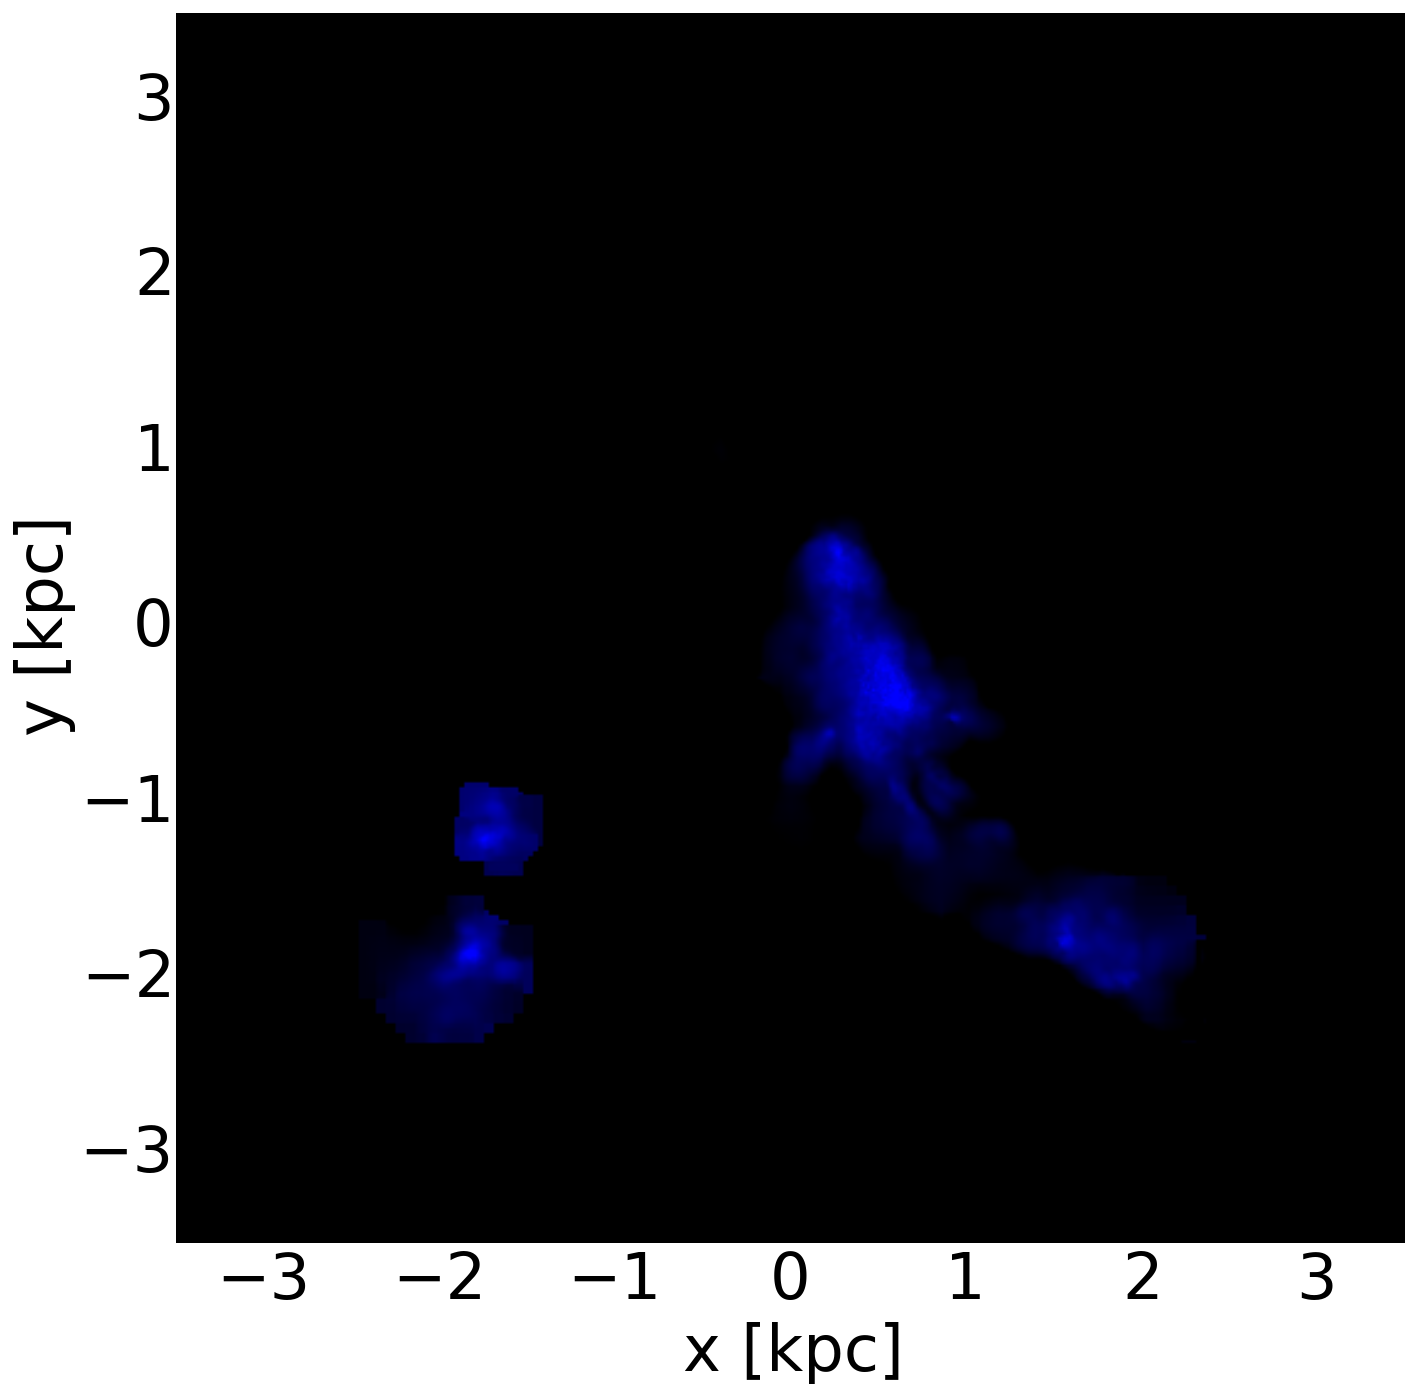

In [16]:
with pynbody.transformation.translate(impData,coords):
    # pynbody.analysis.angmom.faceon(impData,cen=(0,0,0),disk_size='20 kpc')
    pynbody.plot.stars.render(s,width='7 kpc', dynamic_range=3, r_scale=0,g_scale=0,b_scale=1.0)

In [11]:
s

<SimSnap "output_00097" len=457637396>

In [ ]:
with pynbody.transformation.translate(impData,coords):
    #pynbody.analysis.angmom.faceon(impData,cen=(0,0,0),disk_size='4 kpc')
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #ax.set_xlabel(fontsize=40)
    fileOut = "img_log_halo_Density-z=%.1lf-%d.pdf"% (z,i)
    titleStr = "Density - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,i)
    print (titleStr)
    sph.image(s.g,qty="rho",width='7 kpc',cmap="terrain", denoise=True ,av_z=False, units="m_p cm^-3",
                      log=True, approximate_fast=False, 
                      subplot=ax,qtytitle=r"${\rm log}\,m_{\rm p}/{\rm cm}^{3}$"); 
    #ax.set_yticks([-tic, 0,tic])
    plt.savefig(fileOut,dpi=fig.dpi,bbox_inches='tight')
    #plt.close(fig)
    #del(ax)
    gc.collect()


Density - z = 9.0


In [9]:
gc.collect()

6

Density - z = 13.0


/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


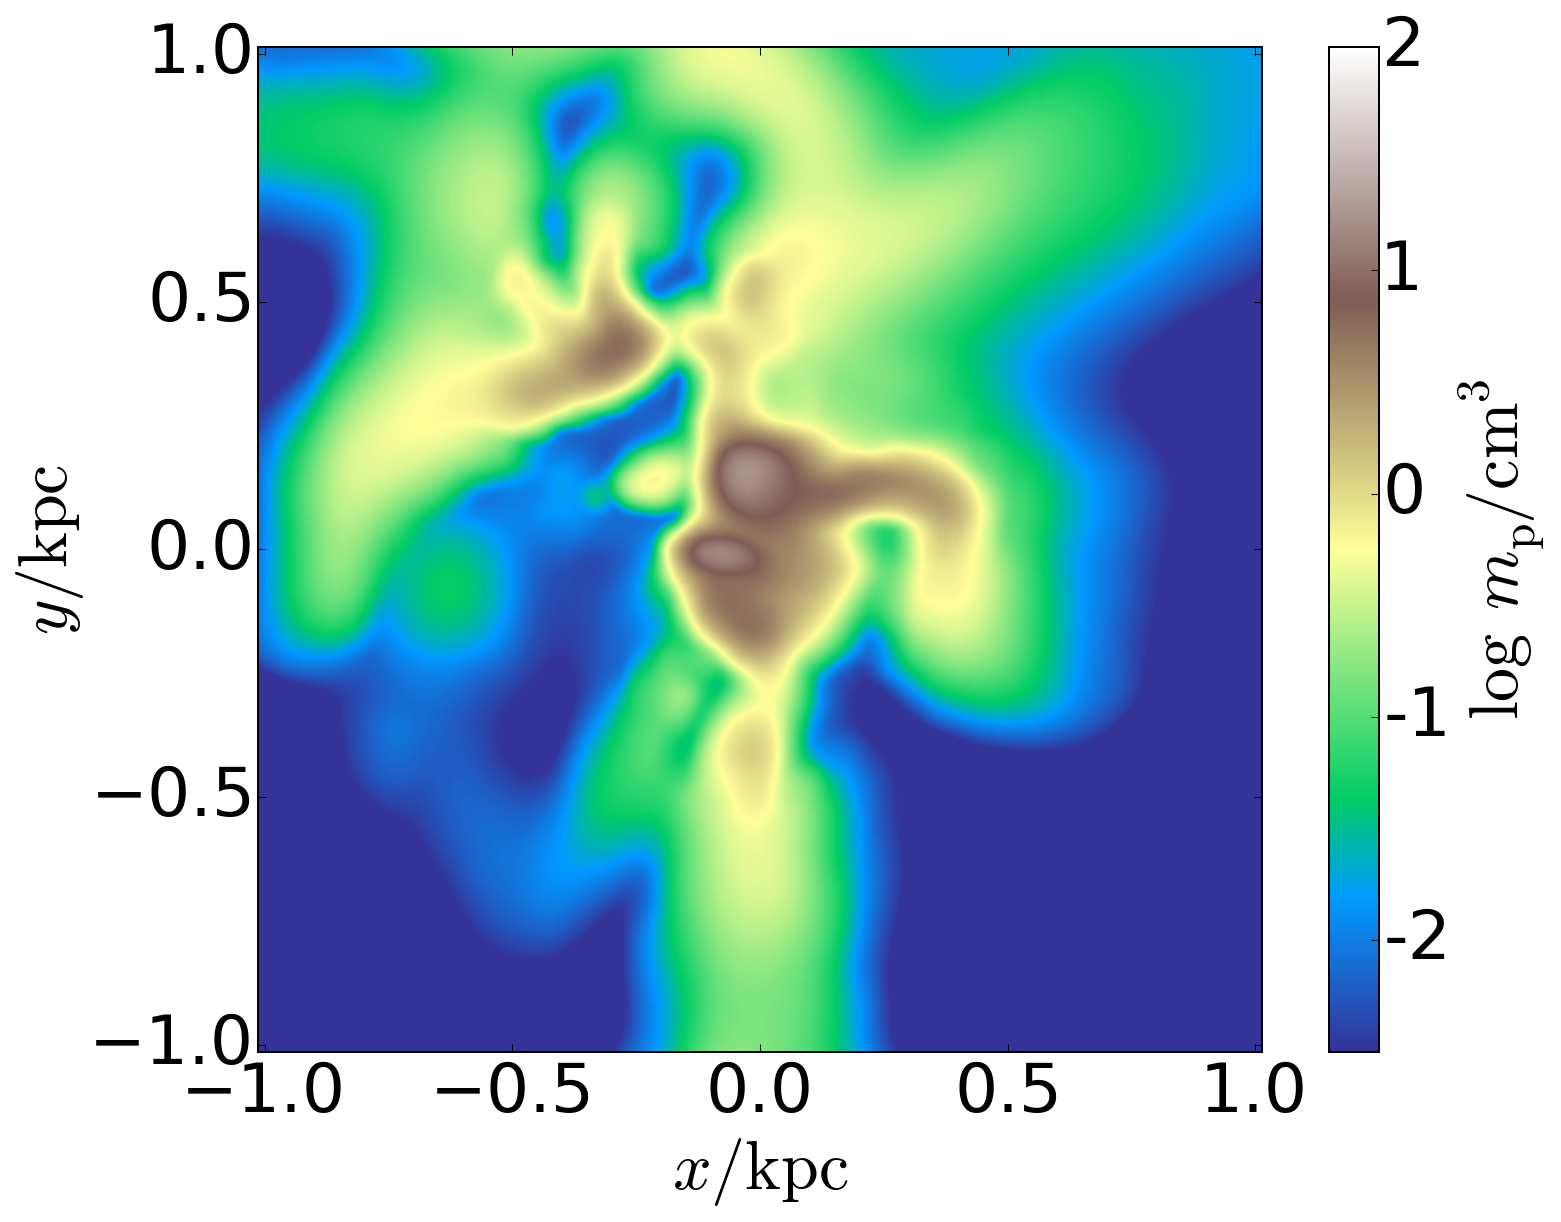

In [17]:
with pynbody.transformation.translate(impData,coords):
    impData.rotate_x(90)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #ax.set_xlabel(fontsize=40)
    fileOut = "img_log_halo_edge_Density-z=%.1lf-%d.pdf"% (z,i)
    titleStr = "Density - z = %.1lf" % z# + "\n[%.2lf %.2lf %.2lf]"%(rx,ry,i)
    print (titleStr)
    sph.image(impData.g,qty="rho",width=smallbox,cmap="terrain", denoise=True ,av_z=False, units="m_p cm^-3",
                      log=True, approximate_fast=False, vmin=10**-2.5, vmax=10**2.0,
                      subplot=ax,qtytitle=r"${\rm log}\,m_{\rm p}/{\rm cm}^{3}$"); 
    #ax.set_yticks([-tic, 0,tic])
    plt.savefig(fileOut,dpi=fig.dpi,bbox_inches='tight')
    #plt.close(fig)
    #del(ax)
    gc.collect()


# Star particles

In [64]:
dotNorm = 10.0  # For dot-size scaling
sbox    = 40 / (1.0 + z) * 0.71 # 5 kpc comoving box
print("Boxsize for star plots %0.2lf"%sbox)
radius = ma.sqrt(1.0**2 * 3.0)
print("Radius of star particles to select from center of halo: %.2lf"%radius)
boxFontSize = 28
labelSize = 34

nullfmt = NullFormatter()

Boxsize for star plots 2.03
Radius of star particles to select from center of halo: 1.73


In [65]:
locs = np.loadtxt("spLoc_%05.2f.txt"%(z),skiprows=1)
mass = np.loadtxt("spMass_%05.2f.txt"%(z),skiprows=1)
Z    = np.loadtxt("spZ_%05.2f.txt"%(z),skiprows=1) # SOLAR units in the file... 
PZ   = np.loadtxt("spPZ_%05.2f.txt"%(z),skiprows=1) # SOLAR units in the file... 
PPF  = np.loadtxt("spPPF_%05.2f.txt"%(z),skiprows=1) 

In [66]:
# rx,ry,rz are the coords of the halo of interest center
# coords = -(rx,ry,rz)
# translate out points to the center of the halo
locs += coords
dists = np.linalg.norm(locs,axis=1)
# locs -= coords # Leave the stars translated to our origin!! 

In [67]:
haloStars=locs[dists <= radius]
mass = mass[dists <= radius]
Z    = Z[dists <= radius]
PZ   = PZ[dists <= radius]
PPF  = PPF[dists <= radius]

In [68]:
len(haloStars),len(Z)

(3543, 3543)

In [69]:
fpol = (1-PPF)
fpol[fpol<1e-7] = 0 # Don't let tiny numbers magnify Z !! Just use Z = 0 for these guys

# Do the correcting before fixing Z for subcritical values... otherwise, we bias Z/f_pol
Zf=Z/fpol # This is our Z corrected for f_pol
Zf[np.isinf(Zf)] = 10**-7.5 # Fix Zf for sp's with very very low polluted fractions. They are essentially pristine
Zf[np.isnan(Zf)] = 10**-7.5
Zf[Zf<1e-7] = 10**-7.5

Z[Z<1e-7] = 10**-7.5

PZf=PZ/fpol
PZf[np.isinf(PZf)] = 10**-7.5
PZf[np.isnan(PZf)] = 10**-7.5

PZ[PZ<1e-7] = 10**-7.5

PPF[PPF<1e-7] = 10**-7.5

/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in true_divide


In [70]:
# Pick out stars by metallicity range... 
rng1 = (Z <= 1.e-5)
rng2 = ((Z > 1.e-5) & (Z <= 1.e-3))
rng3 = ((Z > 1.e-3) & (Z <= 1.e-1))
rng4 = (Z > 1.e-1)

# Pick out stars by corrected metallicity range... 
rngf1 = (Zf <= 1.e-5)
rngf2 = ((Zf > 1.e-5) & (Zf <= 1.e-3))
rngf3 = ((Zf > 1.e-3) & (Zf <= 1.e-1))
rngf4 = (Zf > 1.e-1)

# Pick out stars by pristine fraction, in ranges... 
pfrng1 = (PPF <= 1.e-5)
pfrng2 = ((PPF > 1.e-5) & (PPF <= 1.e-3))
pfrng3 = ((PPF > 1.e-3) & (PPF <= 1.e-1))
pfrng4 = (PPF > 1.e-1)

pzrng1 = (PZ <= 1.e-5)
pzrng2 = ((PZ > 1.e-5) & (PZ <= 1.e-3))
pzrng3 = ((PZ > 1.e-3) & (PZ <= 1.e-1))
pzrng4 = (PZ > 1.e-1)

pzrngf1 = (PZf <= 1.e-5)
pzrngf2 = ((PZf > 1.e-5) & (PZf <= 1.e-3))
pzrngf3 = ((PZf > 1.e-3) & (PZf <= 1.e-1))
pzrngf4 = (PZf > 1.e-1)

In [71]:
z1=np.log10(Z[rng1])
z2=np.log10(Z[rng2])
z3=np.log10(Z[rng3])
z4=np.log10(Z[rng4])

zf1=np.log10(Zf[rngf1]) # zf is the corrected Z of the star particle
zf2=np.log10(Zf[rngf2])
zf3=np.log10(Zf[rngf3])
zf4=np.log10(Zf[rngf4])

pf1=np.log10(PPF[pfrng1])
pf2=np.log10(PPF[pfrng2])
pf3=np.log10(PPF[pfrng3])
pf4=np.log10(PPF[pfrng4])

pz1=np.log10(PZ[pzrng1])
pz2=np.log10(PZ[pzrng2])
pz3=np.log10(PZ[pzrng3])
pz4=np.log10(PZ[pzrng4])

pzf1=np.log10(PZf[pzrngf1])
pzf2=np.log10(PZf[pzrngf2])
pzf3=np.log10(PZf[pzrngf3])
pzf4=np.log10(PZf[pzrngf4])

In [78]:
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(ii) for ii in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5,.5,.5,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(-7.5,0,16)
ticks  =[-7,-6,-5,-4,-3,-2,-1,0]
tics = [-.3, 0.0, .3]
norm   = mpl.colors.BoundaryNorm(bounds, cmap.N)
fmt = '%0.1f'
# xoff = 0.095
# yoff = 0.01
xoff = 0.05
yoff = 0.0027




-1.01431569961 1.01431569961
-2.02863139922
2.0286313992239573


/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21484 but corresponding boolean dimension is 3543
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21484 but corresponding boolean dimension is 3543
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21484 but corresponding boolean dimension is 3543
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21484 but corresponding boolean dimension is 3543
/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: Fu

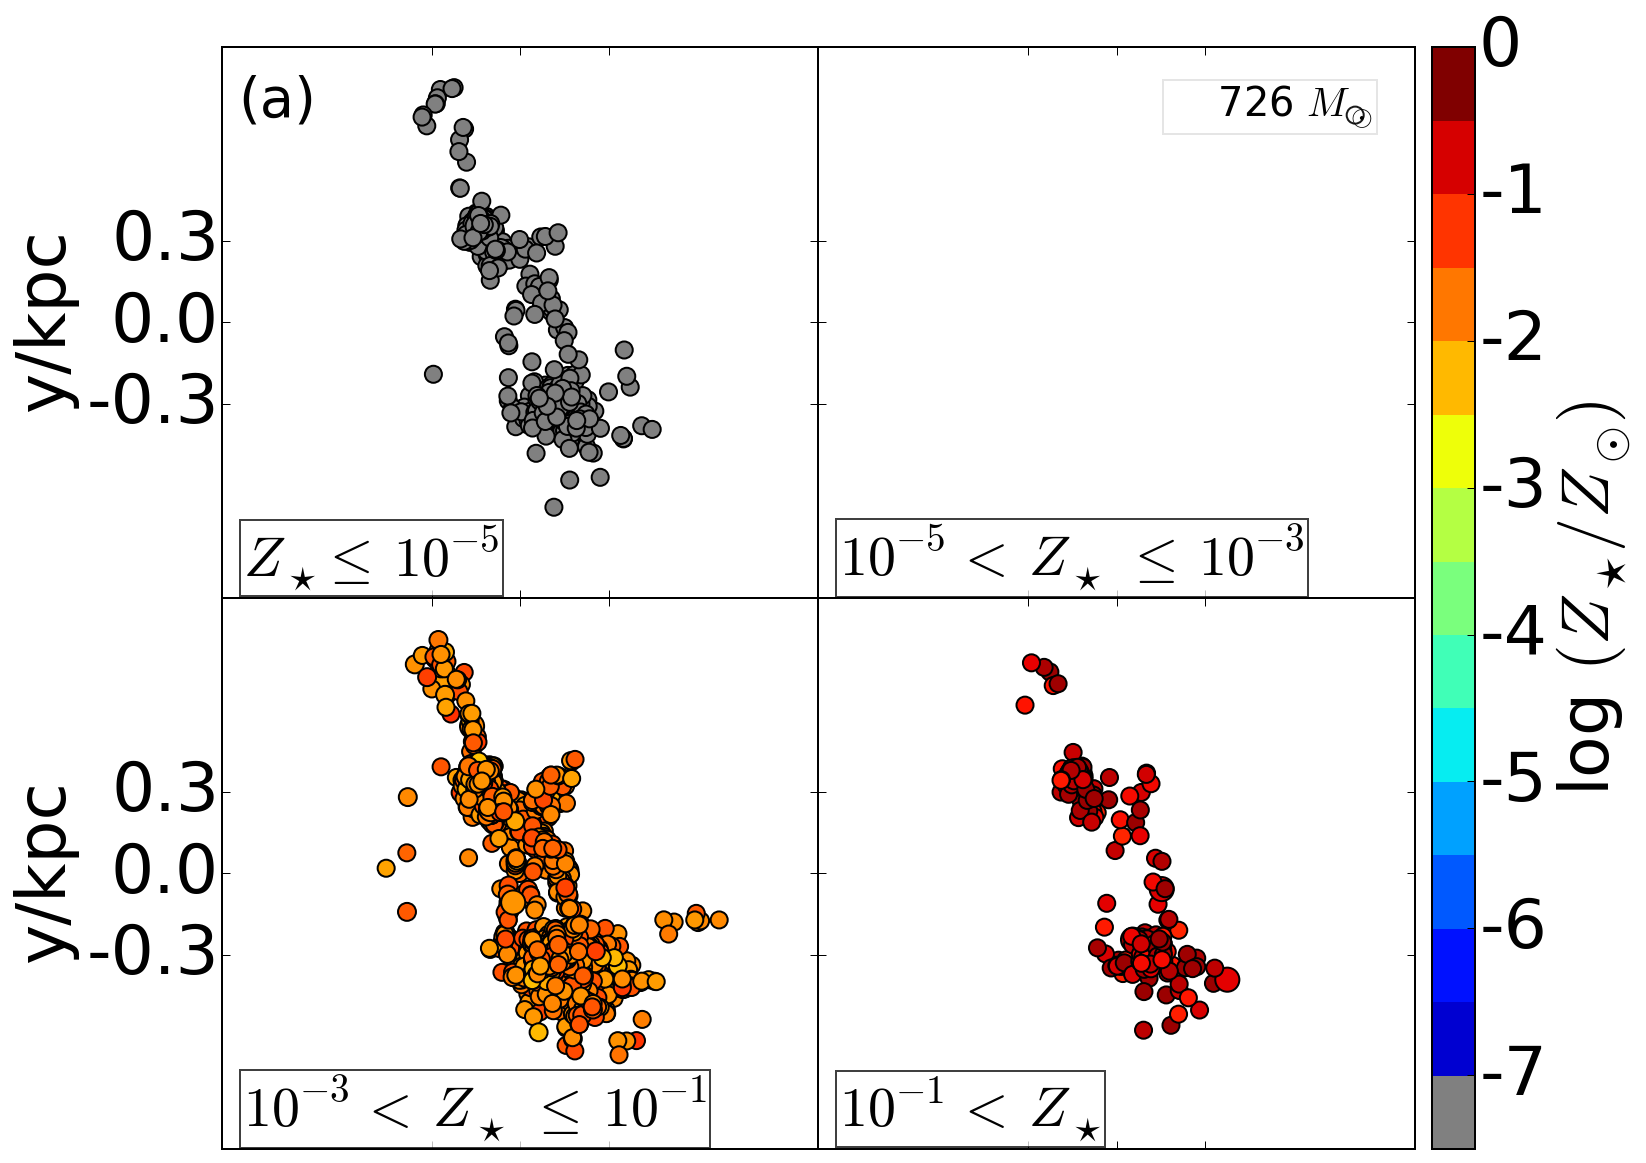

In [79]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = locs[:,0]; ycoord = locs[:,1]
ax1.scatter(xcoord[rngf1], ycoord[rngf1], s=mass[rngf1]/dotNorm, c=zf1, cmap=cmap,vmin=-7.5, vmax=0)
ax2.scatter(xcoord[rngf2], ycoord[rngf2], s=mass[rngf2]/dotNorm, c=zf2, cmap=cmap,vmin=-7.5, vmax=0)
ax3.scatter(xcoord[rngf3], ycoord[rngf3], s=mass[rngf3]/dotNorm, c=zf3, cmap=cmap,vmin=-7.5, vmax=0)
ax4.scatter(xcoord[rngf4], ycoord[rngf4], s=mass[rngf4]/dotNorm, c=zf4, cmap=cmap,vmin=-7.5, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,'$Z_{\star} \leq\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax2.text(xpos,ypos,'$10^{-5} <\, Z_{\star}\, \leq\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax3.text(xpos,ypos,'$10^{-3} <\, Z_{\star}\, \leq\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax4.text(xpos,ypos,'$10^{-1} <\, Z_{\star}\,$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(a)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
print(startx,endx)
print(startx-endx)
print(sbox)

formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(nullfmt)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(nullfmt)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(nullfmt)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(nullfmt)

#ax3.set_xlabel('x kpc')
#ax4.set_xlabel('x kpc')
ax1.set_ylabel('y/kpc')
ax3.set_ylabel('y/kpc')

xpos = ax2.get_xlim()[1] - 0.15 * ax1.get_xlim()[1]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
size = min(mass)
legStr = '    {:.0f}'.format(size)
legStr = legStr + " $M_{\odot}$"
bbox = {'facecolor':'white', 'alpha':0.1, 'pad':4}
ax2.annotate(legStr,xy=(xpos,ypos), xytext=(xpos+0.01, ypos), horizontalalignment='right', bbox=bbox, size=20)
ax2.scatter(np.array([xpos-xoff]), np.array([ypos+yoff]), s=np.array([min(mass)])/dotNorm,facecolors='none')


# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel('log $(Z_{\star}/Z_{\odot})$', size=labelSize)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
plt.savefig("SP_Z_locs_Zcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()




-1.01431569961 1.01431569961
-2.02863139922
2.0286313992239573


/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21484 but corresponding boolean dimension is 3543
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21484 but corresponding boolean dimension is 3543
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21484 but corresponding boolean dimension is 3543
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21484 but corresponding boolean dimension is 3543
/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: F

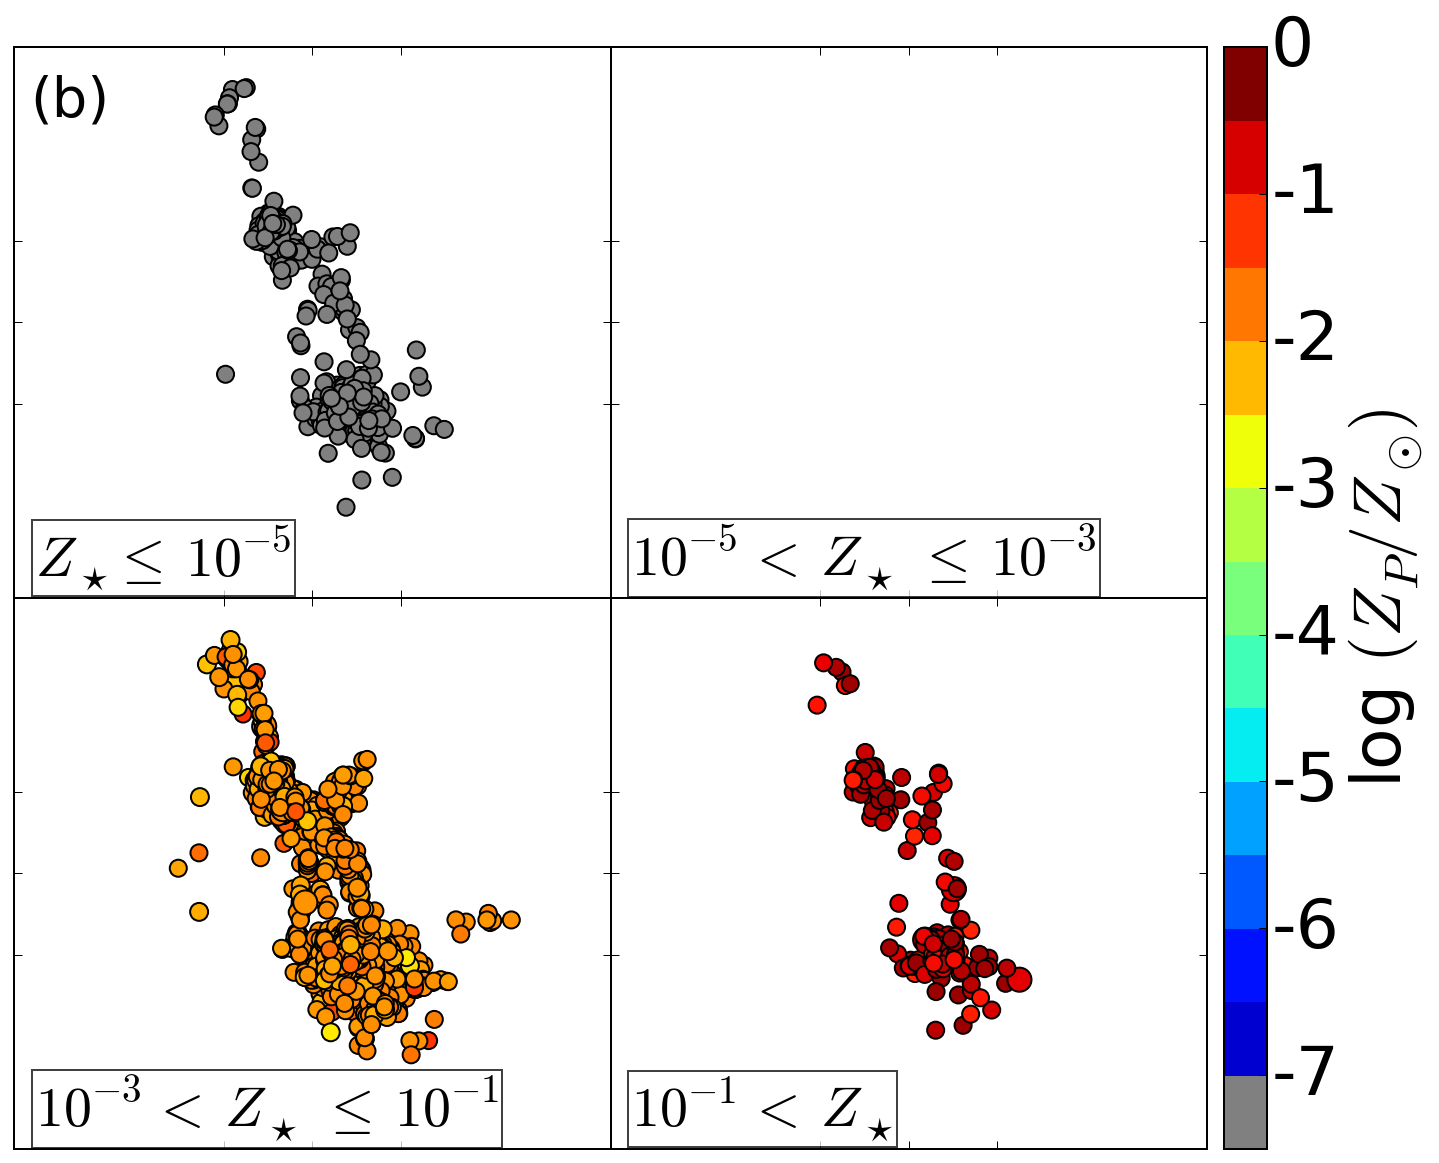

In [80]:
# Color according to Z_P ... but cut on Z/Z_fpol
# Use Z cuts for PPF data... 
z1=np.log10(PZf[rngf1])
z2=np.log10(PZf[rngf2])
z3=np.log10(PZf[rngf3])
z4=np.log10(PZf[rngf4])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = locs[:,0]; ycoord = locs[:,1]
ax1.scatter(xcoord[rngf1], ycoord[rngf1], s=mass[rngf1]/dotNorm, c=z1, cmap=cmap,vmin=-7.5, vmax=0)
ax2.scatter(xcoord[rngf2], ycoord[rngf2], s=mass[rngf2]/dotNorm, c=z2, cmap=cmap,vmin=-7.5, vmax=0)
ax3.scatter(xcoord[rngf3], ycoord[rngf3], s=mass[rngf3]/dotNorm, c=z3, cmap=cmap,vmin=-7.5, vmax=0)
ax4.scatter(xcoord[rngf4], ycoord[rngf4], s=mass[rngf4]/dotNorm, c=z4, cmap=cmap,vmin=-7.5, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,'$Z_{\star} \leq\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax2.text(xpos,ypos,'$10^{-5} <\, Z_{\star}\, \leq\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax3.text(xpos,ypos,'$10^{-3} <\, Z_{\star}\, \leq\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax4.text(xpos,ypos,'$10^{-1} <\, Z_{\star}$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(b)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(nullfmt)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(nullfmt)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(nullfmt)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(nullfmt)
print(startx,endx)
print(startx-endx)
print(sbox)

#ax3.set_xlabel('x kpc')
#ax4.set_xlabel('x kpc')
#ax1.set_ylabel('y kpc')
#ax3.set_ylabel('y kpc')

# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel(r'log $(Z_{P}/Z_{\odot})$', size=labelSize)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
plt.savefig("SP_PZ_locs_Zcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()

/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21484 but corresponding boolean dimension is 3543
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21484 but corresponding boolean dimension is 3543
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21484 but corresponding boolean dimension is 3543
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21484 but corresponding boolean dimension is 3543


-1.01431569961 1.01431569961
-2.02863139922
2.0286313992239573


/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


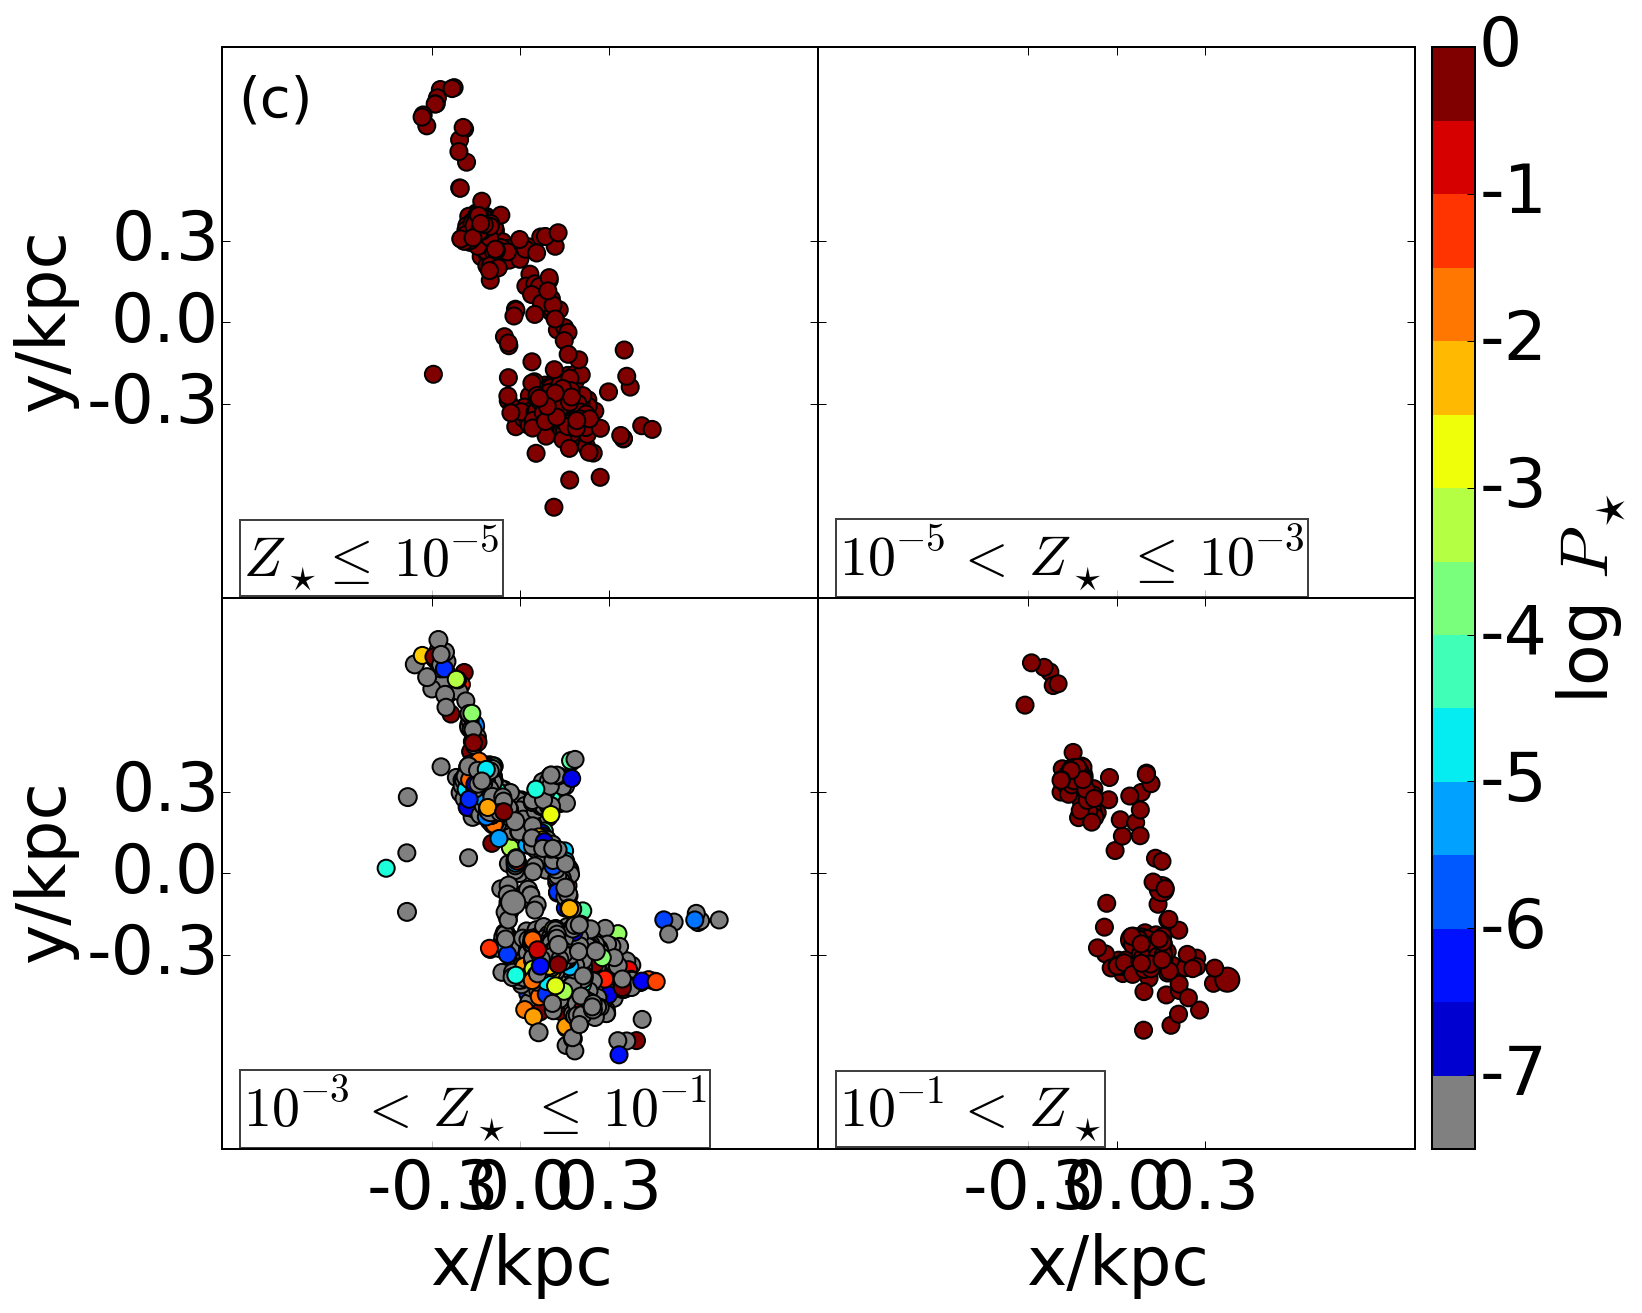

In [81]:
#rng1 = (PPF < 1.e-5)
#rng2 = ((PPF >= 1.e-5) & (PPF < 1.e-3))
#rng3 = ((PPF >= 1.e-3) & (PPF < 1.e-1))
#rng4 = (PPF >= 1.e-1)
# Use Z cuts for PPF data... 
z1=np.log10(PPF[rngf1])
z2=np.log10(PPF[rngf2])
z3=np.log10(PPF[rngf3])
z4=np.log10(PPF[rngf4])
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = locs[:,0]; ycoord = locs[:,1]
ax1.scatter(xcoord[rngf1], ycoord[rngf1], s=mass[rngf1]/dotNorm, c=z1, cmap=cmap,vmin=-7.5, vmax=0)
ax2.scatter(xcoord[rngf2], ycoord[rngf2], s=mass[rngf2]/dotNorm, c=z2, cmap=cmap,vmin=-7.5, vmax=0)
ax3.scatter(xcoord[rngf3], ycoord[rngf3], s=mass[rngf3]/dotNorm, c=z3, cmap=cmap,vmin=-7.5, vmax=0)
ax4.scatter(xcoord[rngf4], ycoord[rngf4], s=mass[rngf4]/dotNorm, c=z4, cmap=cmap,vmin=-7.5, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,'$Z_{\star} \leq\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax2.text(xpos,ypos,'$10^{-5} <\, Z_{\star}\, \leq\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax3.text(xpos,ypos,'$10^{-3} <\, Z_{\star}\, \leq\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax4.text(xpos,ypos,'$10^{-1} <\, Z_{\star}$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(c)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)

ax3.set_xlabel('x/kpc')
ax4.set_xlabel('x/kpc')
ax1.set_ylabel('y/kpc')
ax3.set_ylabel('y/kpc')
print(startx,endx)
print(startx-endx)
print(sbox)


# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel('log $P_{\star}$', size=labelSize)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
#plt.savefig("SP_PF_locs_Zcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()

/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21484 but corresponding boolean dimension is 3543
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21484 but corresponding boolean dimension is 3543
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21484 but corresponding boolean dimension is 3543
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21484 but corresponding boolean dimension is 3543


-1.01431569961 1.01431569961
-2.02863139922
2.0286313992239573


/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


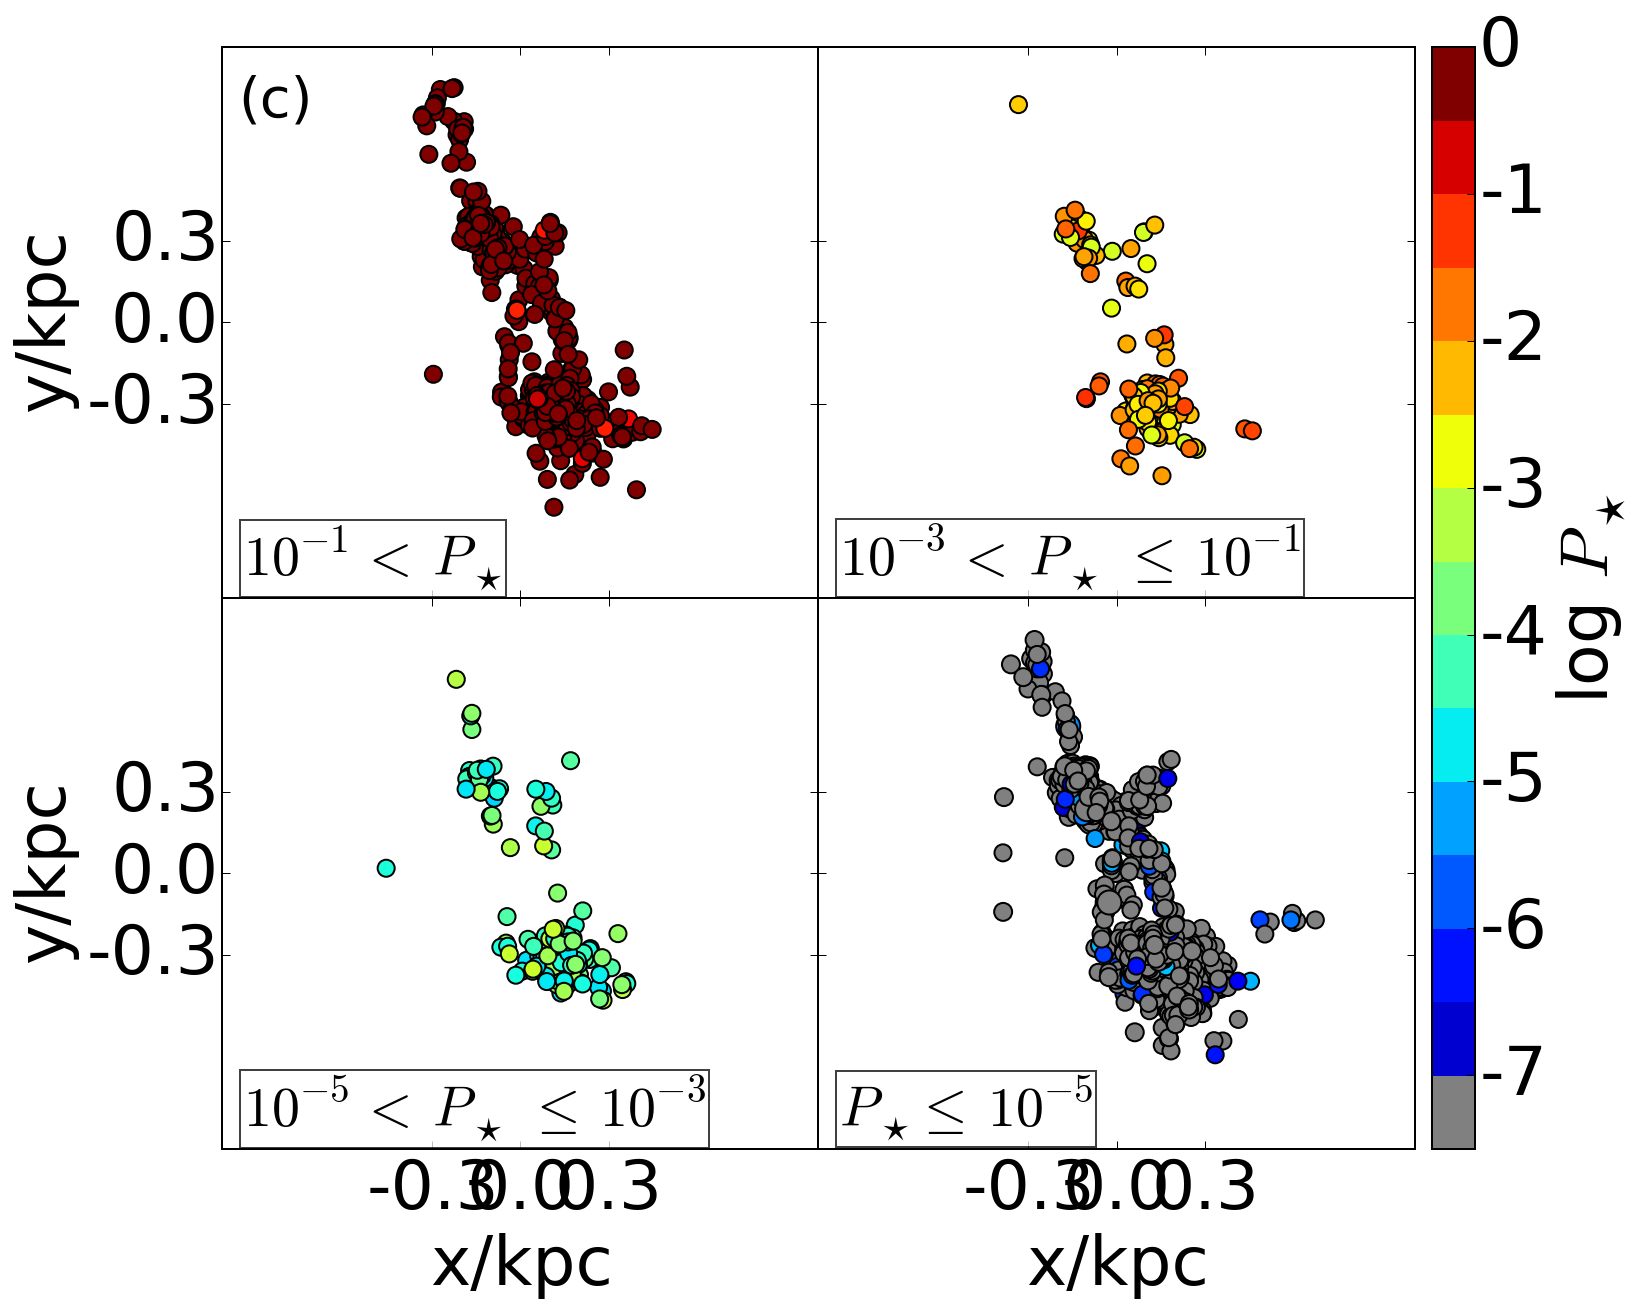

In [82]:
rng1 = (PPF <= 1.e-5)
rng2 = ((PPF > 1.e-5) & (PPF <= 1.e-3))
rng3 = ((PPF > 1.e-3) & (PPF <= 1.e-1))
rng4 = (PPF > 1.e-1)
# Use PF cuts for PPF data... 
z1=np.log10(PPF[rng1])
z2=np.log10(PPF[rng2])
z3=np.log10(PPF[rng3])
z4=np.log10(PPF[rng4])
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = locs[:,0]; ycoord = locs[:,1]
ax4.scatter(xcoord[rng1], ycoord[rng1], s=mass[rng1]/dotNorm, c=z1, cmap=cmap,vmin=-7.5, vmax=0)
ax3.scatter(xcoord[rng2], ycoord[rng2], s=mass[rng2]/dotNorm, c=z2, cmap=cmap,vmin=-7.5, vmax=0)
ax2.scatter(xcoord[rng3], ycoord[rng3], s=mass[rng3]/dotNorm, c=z3, cmap=cmap,vmin=-7.5, vmax=0)
ax1.scatter(xcoord[rng4], ycoord[rng4], s=mass[rng4]/dotNorm, c=z4, cmap=cmap,vmin=-7.5, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax4.text(xpos,ypos,'$P_{\star} \leq\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax3.text(xpos,ypos,'$10^{-5} <\, P_{\star}\, \leq\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax2.text(xpos,ypos,'$10^{-3} <\, P_{\star}\, \leq\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax1.text(xpos,ypos,'$10^{-1} <\, P_{\star}$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(c)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)

#ax1.yaxis.set_ticks([]); ax1.yaxis.set_major_formatter(formatter)
#ax3.yaxis.set_ticks([]); ax3.yaxis.set_major_formatter(formatter)

ax3.set_xlabel('x/kpc')
ax4.set_xlabel('x/kpc')
ax1.set_ylabel('y/kpc')
ax3.set_ylabel('y/kpc')
print(startx,endx)
print(startx-endx)
print(sbox)

# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel('log $P_{\star}$', size=34)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
plt.savefig("SP_PF_locs_PFcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()



-1.01431569961 1.01431569961
-2.02863139922
2.0286313992239573


/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21484 but corresponding boolean dimension is 3543
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21484 but corresponding boolean dimension is 3543
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21484 but corresponding boolean dimension is 3543
/Users/earnric/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 21484 but corresponding boolean dimension is 3543
/Users/earnric/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: F

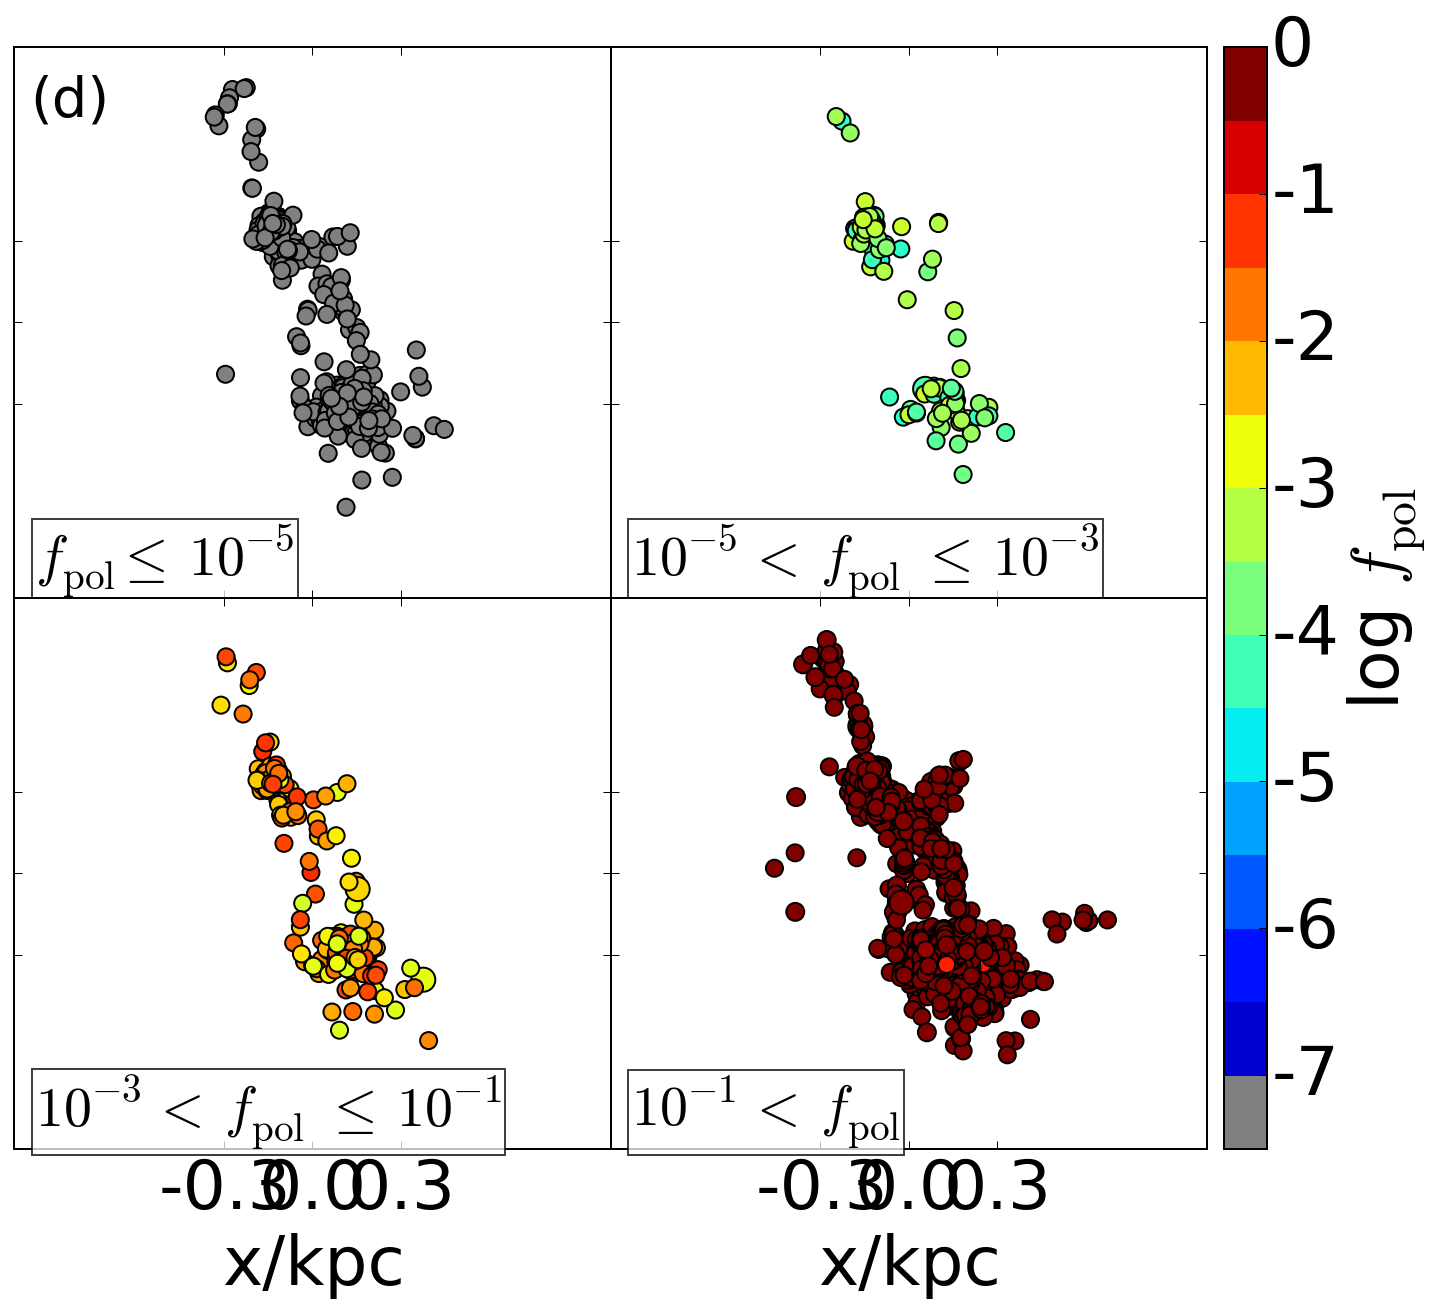

In [83]:
# Plotting fpol: a particle that is 99% pristine falls in P >= .1 ... 
# But that same particle is 1-.99 = 0.01 polluted ... and falls in 0.001 <= fpol < 0.1
fpol[fpol < 1e-7] = 10**-7.5
rng1 = (fpol <= 1.e-5)
rng2 = ((fpol > 1.e-5) & (fpol <= 1.e-3))
rng3 = ((fpol > 1.e-3) & (fpol <= 1.e-1))
rng4 = (fpol > 1.e-1)
# Use PF cuts for PPF data... 
z1=np.log10(fpol[rng1])
z2=np.log10(fpol[rng2])
z3=np.log10(fpol[rng3])
z4=np.log10(fpol[rng4])
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in [ax1,ax2]], visible=False)
plt.setp([a.get_yticklabels() for a in [ax2,ax4]], visible=False)
plt.setp([a.set_xlim([-sbox/2.0,sbox/2.0]) for a in [ax1,ax2,ax3,ax4]])
plt.setp([a.set_ylim([-sbox/2.0,sbox/2.0]) for a in [ax2,ax4,ax3,ax4]])

xcoord = locs[:,0]; ycoord = locs[:,1]
ax1.scatter(xcoord[rng1], ycoord[rng1], s=mass[rng1]/dotNorm, c=z1, cmap=cmap,vmin=-7.5, vmax=0)
ax2.scatter(xcoord[rng2], ycoord[rng2], s=mass[rng2]/dotNorm, c=z2, cmap=cmap,vmin=-7.5, vmax=0)
ax3.scatter(xcoord[rng3], ycoord[rng3], s=mass[rng3]/dotNorm, c=z3, cmap=cmap,vmin=-7.5, vmax=0)
ax4.scatter(xcoord[rng4], ycoord[rng4], s=mass[rng4]/dotNorm, c=z4, cmap=cmap,vmin=-7.5, vmax=0)
# create a second axes for the colorbar
ax5 = fig.add_axes([0.85, 0.1, 0.025, 0.85])
cb = mpl.colorbar.ColorbarBase(ax5, cmap=cmap, norm=norm, spacing='proportional',
                                ticks=ticks, boundaries=bounds, format='%1i')
## fig.suptitle('Star Particles z=%.1lf, %.1lf kpc comoving\nCenter: [%.2lf,%.2lf,%.2lf]'%
##              (z,comovbox,xo,yo,zo),size=24)
xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax1.get_ylim()[0] - 0.08 * ax1.get_ylim()[0]
bbox = {'facecolor':'white', 'alpha':0.75, 'pad':3}
ax1.text(xpos,ypos,r'$f_{\rm pol} \leq\, 10^{-5}$',bbox=bbox, fontsize=boxFontSize)
ax2.text(xpos,ypos,r'$10^{-5} <\, f_{\rm pol}\, \leq\, 10^{-3}$',bbox=bbox,fontsize=boxFontSize)
ax3.text(xpos,ypos,r'$10^{-3} <\, f_{\rm pol}\, \leq\, 10^{-1}$',bbox=bbox,fontsize=boxFontSize)
ax4.text(xpos,ypos,r'$10^{-1} <\, f_{\rm pol}$',bbox=bbox,fontsize=boxFontSize)

xpos = ax1.get_xlim()[0] - 0.07 * ax1.get_xlim()[0]
ypos = ax2.get_ylim()[1] - 0.25 * ax1.get_ylim()[1]
ax1.text(xpos,ypos,'(d)', fontsize=boxFontSize)
# ax2.text(xpos,ypos,'(b)',fontsize=boxFontSize)
# ax3.text(xpos,ypos,'(c)',fontsize=boxFontSize)
# ax4.text(xpos,ypos,'(d)',fontsize=boxFontSize)

startx, endx = ax1.get_xlim(); dx = (endx-startx) * 0.1
starty, endy = ax1.get_ylim(); dy = (endy-starty) * 0.1
formatter = FormatStrFormatter(fmt)
ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_ticks(tics); ax3.xaxis.set_major_formatter(formatter)
ax4.xaxis.set_ticks(tics); ax4.xaxis.set_major_formatter(formatter)

ax1.yaxis.set_ticks(tics); ax1.yaxis.set_major_formatter(nullfmt)
ax3.yaxis.set_ticks(tics); ax3.yaxis.set_major_formatter(nullfmt)

ax3.set_xlabel('x/kpc')
ax4.set_xlabel('x/kpc')
#ax1.set_ylabel('y kpc')
#ax3.set_ylabel('y kpc')
print(startx,endx)
print(startx-endx)
print(sbox)

# Control number of ticks
#ax3.locator_params(nbins=3)
#ax4.locator_params(nbins=3)
#ax1.locator_params(nbins=3)

ax5.set_ylabel(r'log $f_{\rm pol}$', size=34)
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.84, top=.95, wspace=.0, hspace=.0)
plt.savefig("SP_fpol_locs_fpolcut_z=%04.1lf-%d.pdf"%(z,i), dpi=fig.dpi,bbox_inches='tight')
plt.show()